# Project in Data Analysis
## Dataset "Superstore"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
import seaborn as sns

#%matplotlib inline

### Loading data

In [2]:
data_original = pd.read_excel('Sample - Superstore.xls')
data_original.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


How many trials are in this dataset?

In [8]:
print('Number of rows: ',data_original.shape[0],'\nNumber of columns: ',data_original.shape[1])

Number of rows:  9994 
Number of columns:  21


In [9]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

To check if there are any missing values in the entire data set

In [10]:
data_original.isnull().values.any()

False

Which of the columns are not important? Can we remove some?

In [11]:
data_original['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [12]:
data_truncated = data_original.drop(['Country', 'Postal Code', 'Region'], axis = 1)
data_truncated.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [13]:
data_truncated.State.value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

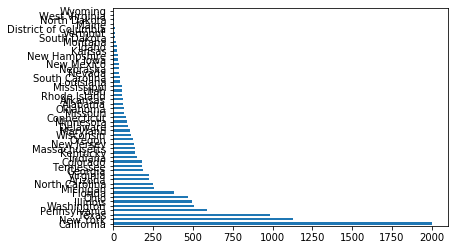

In [14]:
data_truncated.State.value_counts().plot.barh()

In [15]:
data_truncated['Order Date in Year'] = data_truncated['Order Date'].dt.strftime('%Y')
data_truncated['Order Date in Year']

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9989    2014
9990    2017
9991    2017
9992    2017
9993    2017
Name: Order Date in Year, Length: 9994, dtype: object

In [16]:
dt_1 = data_truncated.groupby(['Order Date in Year', 'Product Name', 'Quantity']).size().unstack()
dt_1

Quantity                                                                1   \
Order Date in Year Product Name                                              
2014               #10 White Business Envelopes,4 1/8 x 9 1/2          NaN   
                   #10- 4 1/8" x 9 1/2" Recycled Envelopes             NaN   
                   #10- 4 1/8" x 9 1/2" Security-Tint Envelopes        1.0   
                   1.7 Cubic Foot Compact "Cube" Office Refrigerators  1.0   
                   1/4 Fold Party Design Invitations & White Envel...  1.0   
...                                                                    ...   
2017               iKross Bluetooth Portable Keyboard + Cell Phone...  NaN   
                   iOttie HLCRIO102 Car Mount                          NaN   
                   iOttie XL Car Mount                                 NaN   
                   invisibleSHIELD by ZAGG Smudge-Free Screen Prot...  NaN   
                   netTALK DUO VoIP Telephone Service                  NaN   

Quantity                                                                2   \
Order Date in Year Product Name                                              
2014               #10 White Business Envelopes,4 1/8 x 9 1/2          NaN   
                   #10- 4 1/8" x 9 1/2" Recycled Envelopes             1.0   
                   #10- 4 1/8" x 9 1/2" Security-Tint Envelopes        1.0   
                   1.7 Cubic Foot Compact "Cube" Office Refrigerators  1.0   
                   1/4 Fold Party Design Invitations & White Envel...  NaN   
...                                                                    ...   
2017               iKross Bluetooth Portable Keyboard + Cell Phone...  NaN   
                   iOttie HLCRIO102 Car Mount                          NaN   
                   iOttie XL Car Mount                                 NaN   
                   invisibleSHIELD by ZAGG Smudge-Free Screen Prot...  NaN   
                   netTALK DUO VoIP Telephone Service                  NaN   

Quantity                                                                3   \
Order Date in Year Product Name                                              
2014               #10 White Business Envelopes,4 1/8 x 9 1/2          NaN   
                   #10- 4 1/8" x 9 1/2" Recycled Envelopes             NaN   
                   #10- 4 1/8" x 9 1/2" Security-Tint Envelopes        NaN   
                   1.7 Cubic Foot Compact "Cube" Office Refrigerators  NaN   
                   1/4 Fold Party Design Invitations & White Envel...  NaN   
...                                                                    ...   
2017               iKross Bluetooth Portable Keyboard + Cell Phone...  NaN   
                   iOttie HLCRIO102 Car Mount                          NaN   
                   iOttie XL Car Mount                                 NaN   
                   invisibleSHIELD by ZAGG Smudge-Free Screen Prot...  1.0   
                   netTALK DUO VoIP Telephone Service                  NaN   

Quantity                                                                4   \
Order Date in Year Product Name                                              
2014               #10 White Business Envelopes,4 1/8 x 9 1/2          NaN   
                   #10- 4 1/8" x 9 1/2" Recycled Envelopes             NaN   
                   #10- 4 1/8" x 9 1/2" Security-Tint Envelopes        NaN   
                   1.7 Cubic Foot Compact "Cube" Office Refrigerators  NaN   
                   1/4 Fold Party Design Invitations & White Envel...  NaN   
...                                                                    ...   
2017               iKross Bluetooth Portable Keyboard + Cell Phone...  1.0   
                   iOttie HLCRIO102 Car Mount                          NaN   
                   iOttie XL Car Mount                                 NaN   
                   invisibleSHIELD by ZAGG Smudge-Free Screen Prot...  NaN   
                   

In [17]:
Year = np.unique(pd.Series(data_truncated['Order Date in Year']))
Year

array(['2014', '2015', '2016', '2017'], dtype=object)

In [25]:
#sns.pairplot(data = dt_1)

In [27]:
#dt_1.plot(kind = 'bar', x = np.unique(pd.Series(data_truncated['Order Date in Year'])) )

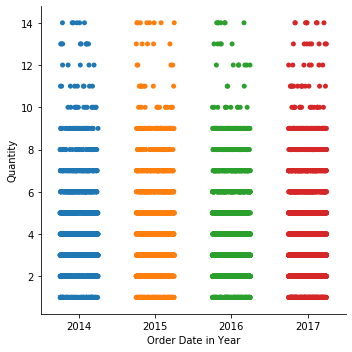

In [29]:
sns.catplot(x='Order Date in Year', y='Quantity',
            data=data_truncated,jitter='0.25')

In [30]:
#sns_data = sns.load_dataset('Sample - Superstore.xls')
#x = np.unique(pd.Series(data_truncated['Order Date in Year'])).T
#y = pd.Series(data_truncated['Sales']).T
#ax = sns.regplot(x=x, y=y, color="g")

In [31]:
data_truncated['Sales per unit'] = data_truncated['Sales'] / data_truncated['Quantity']
data_truncated.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Date in Year,Sales per unit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,130.9800
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,243.9800
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,7.3100
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,191.5155
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,11.1840


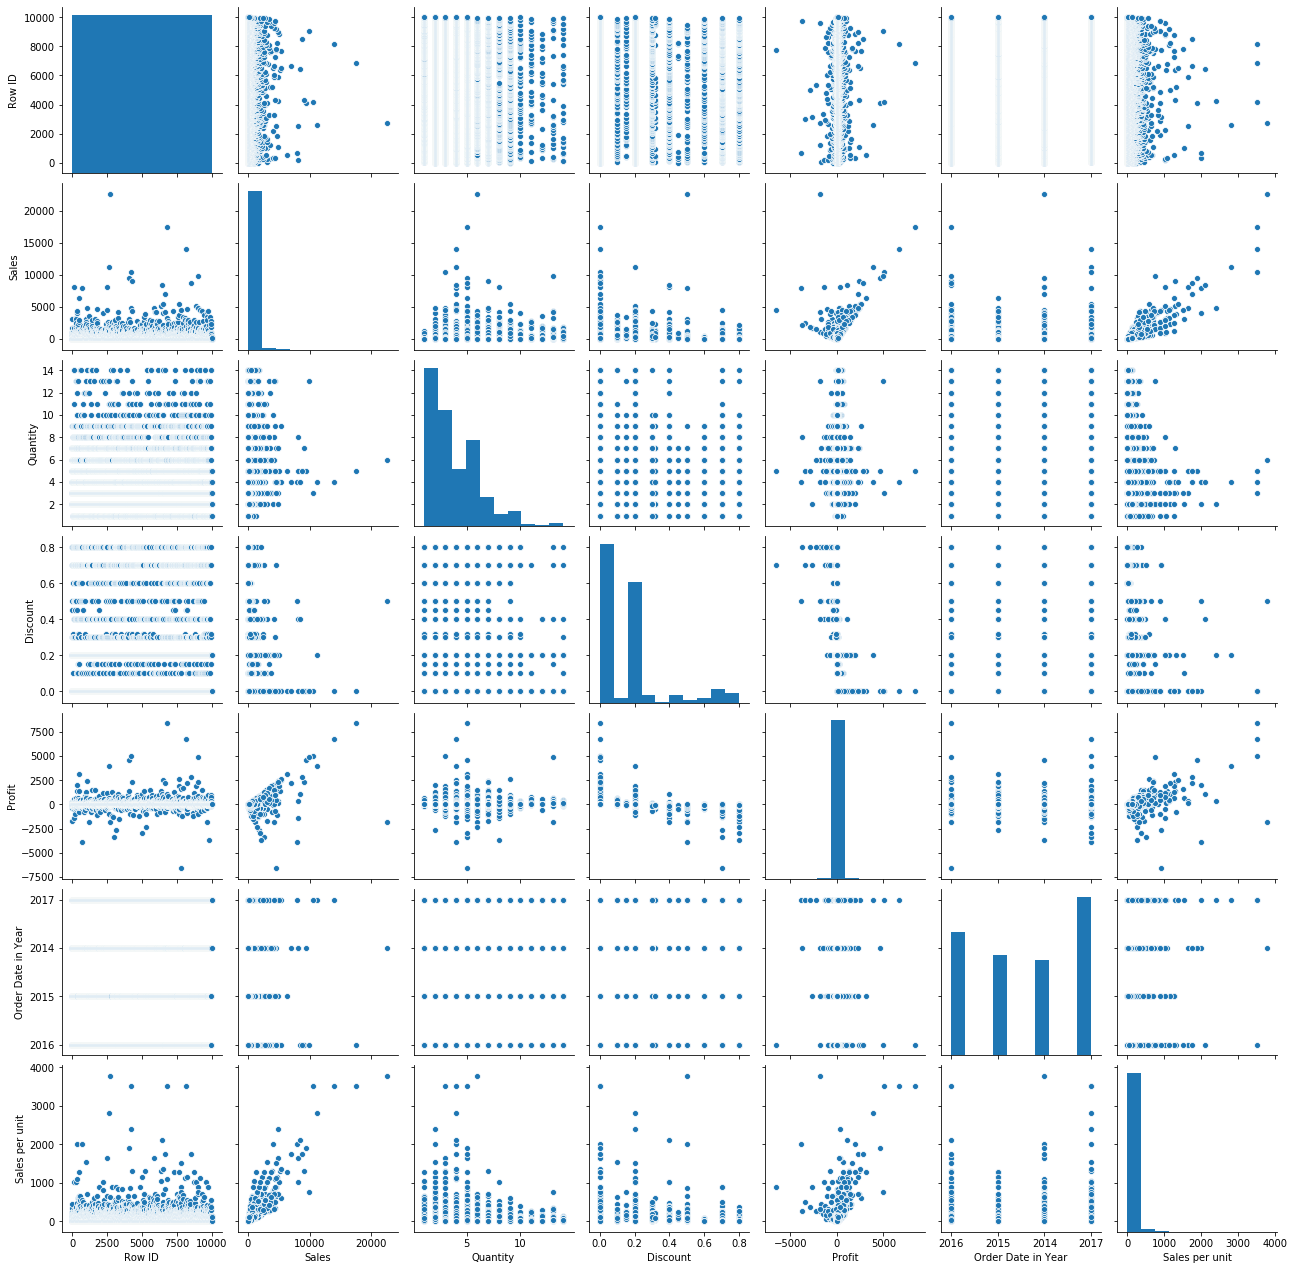

In [32]:
import seaborn as sns
sns.pairplot(data_truncated, );

In [33]:
data_truncated['Days of transport'] = data_truncated['Ship Date'].subtract(data_truncated['Order Date'])
data_truncated.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Date in Year,Sales per unit,Days of transport
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,130.9800,3 days
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,243.9800,3 days
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,7.3100,4 days
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,191.5155,7 days
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,11.1840,7 days


In [34]:
Columns = ['Row ID', 'Order ID','Order Date','Ship Date','Days of transport','Ship Mode','Customer ID','Customer Name','Segment','City','State','Product ID','Category','Sub-Category','Product Name','Sales per unit', 'Sales','Quantity','Discount','Profit']
for i in Columns:
    print(f'The unique elements for the column {i} is {np.unique(data_truncated[i])}\n')


The unique elements for the column Row ID is [   1    2    3 ... 9992 9993 9994]

The unique elements for the column Order ID is ['CA-2014-100006' 'CA-2014-100090' 'CA-2014-100293' ... 'US-2017-169488'
 'US-2017-169502' 'US-2017-169551']

The unique elements for the column Order Date is ['2014-01-03T00:00:00.000000000' '2014-01-04T00:00:00.000000000'
 '2014-01-05T00:00:00.000000000' ... '2017-12-28T00:00:00.000000000'
 '2017-12-29T00:00:00.000000000' '2017-12-30T00:00:00.000000000']

The unique elements for the column Ship Date is ['2014-01-07T00:00:00.000000000' '2014-01-08T00:00:00.000000000'
 '2014-01-10T00:00:00.000000000' ... '2018-01-03T00:00:00.000000000'
 '2018-01-04T00:00:00.000000000' '2018-01-05T00:00:00.000000000']

The unique elements for the column Days of transport is [              0  86400000000000 172800000000000 259200000000000
 345600000000000 432000000000000 518400000000000 604800000000000]

The unique elements for the column Ship Mode is ['First Class' 'Same Day' 

In [35]:
for i in Columns:
    print(f'''The statistics for the column {i} are:
          {data_truncated[i].describe()}\n\n''')

The statistics for the column Row ID are:
          count    9994.000000
mean     4997.500000
std      2885.163629
min         1.000000
25%      2499.250000
50%      4997.500000
75%      7495.750000
max      9994.000000
Name: Row ID, dtype: float64


The statistics for the column Order ID are:
          count               9994
unique              5009
top       CA-2017-100111
freq                  14
Name: Order ID, dtype: object


The statistics for the column Order Date are:
          count                    9994
unique                   1237
top       2016-09-05 00:00:00
freq                       38
first     2014-01-03 00:00:00
last      2017-12-30 00:00:00
Name: Order Date, dtype: object


The statistics for the column Ship Date are:
          count                    9994
unique                   1334
top       2015-12-16 00:00:00
freq                       35
first     2014-01-07 00:00:00
last      2018-01-05 00:00:00
Name: Ship Date, dtype: object


The statistics for the co

In [36]:
data_truncated.loc[data_truncated['Sales'].idxmax()]

Row ID                                                             2698
Order ID                                                 CA-2014-145317
Order Date                                          2014-03-18 00:00:00
Ship Date                                           2014-03-23 00:00:00
Ship Mode                                                Standard Class
Customer ID                                                    SM-20320
Customer Name                                               Sean Miller
Segment                                                     Home Office
City                                                       Jacksonville
State                                                           Florida
Product ID                                              TEC-MA-10002412
Category                                                     Technology
Sub-Category                                                   Machines
Product Name          Cisco TelePresence System EX90 Videoconfer

In [37]:
data_truncated.loc[data_truncated['Profit'].idxmax()]

Row ID                                                 6827
Order ID                                     CA-2016-118689
Order Date                              2016-10-02 00:00:00
Ship Date                               2016-10-09 00:00:00
Ship Mode                                    Standard Class
Customer ID                                        TC-20980
Customer Name                                  Tamara Chand
Segment                                           Corporate
City                                              Lafayette
State                                               Indiana
Product ID                                  TEC-CO-10004722
Category                                         Technology
Sub-Category                                        Copiers
Product Name          Canon imageCLASS 2200 Advanced Copier
Sales                                               17499.9
Quantity                                                  5
Discount                                

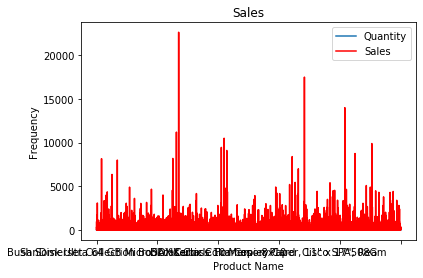

In [38]:
ax = plt.gca()
plot_1 = data_truncated.plot(kind='line', x='Product Name', y= 'Quantity', ax=ax)

plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Sales")

plot_2 = data_truncated.plot(kind='line', x='Product Name', y= 'Sales', color='red', ax=ax)

plt.show()



In [39]:
#Group by the products by each state
Prod_sales = data_truncated.groupby(['State', 'Product Name']) 
  
# Print the first value in each group 
Prod_sales.first()


Row ID  \
State     Product Name                                                 
Alabama   1.7 Cubic Foot Compact "Cube" Office Refrigerators      80   
          14-7/8 x 11 Blue Bar Computer Printout Paper          4922   
          AT&T 17929 Lendline Telephone                         4925   
          Acme Stainless Steel Office Snips                     1433   
          Acrylic Self-Standing Desk Frames                     6255   
...                                                              ...   
Wisconsin Xerox 1917                                            4810   
          Xerox 1940                                            1784   
          Xerox 205                                              816   
          Xerox 217                                             7260   
Wyoming   Global Troy Executive Leather Low-Back Tilter         5870   

                                                                    Order ID  \
State     Product Name                                                         
Alabama   1.7 Cubic Foot Compact "Cube" Office Refrigerators  CA-2016-127208   
          14-7/8 x 11 Blue Bar Computer Printout Paper        CA-2017-114055   
          AT&T 17929 Lendline Telephone                       CA-2017-114055   
          Acme Stainless Steel Office Snips                   CA-2014-120768   
          Acrylic Self-Standing Desk Frames                   CA-2015-151624   
...                                                                      ...   
Wisconsin Xerox 1917                                          CA-2015-151589   
          Xerox 1940                                          CA-2017-166317   
          Xerox 205                                           CA-2015-106565   
          Xerox 217                                           CA-2016-152730   
Wyoming   Global Troy Executive Leather Low-Back Tilter       CA-2016-152247   

                                                             Order Date  \
State     Product Name                                                    
Alabama   1.7 Cubic Foot Compact "Cube" Office Refrigerators 2016-06-12   
          14-7/8 x 11 Blue Bar Computer Printout Paper       2017-12-25   
          AT&T 17929 Lendline Telephone                      2017-12-25   
          Acme Stainless Steel Office Snips                  2014-12-19   
          Acrylic Self-Standing Desk Frames                  2015-09-08   
...                                                                 ...   
Wisconsin Xerox 1917                                         2015-12-27   
          Xerox 1940                                         2017-09-22   
          Xerox 205                                          2015-03-20   
          Xerox 217                                          2016-05-30   
Wyoming   Global Troy Executive Leather Low-Back Tilter      2016-11-07   

                                                              Ship Date  \
State     Product Name                                                    
Alabama   1.7 Cubic Foot Compact "Cube" Office Refrigerators 2016-06-15   
          14-7/8 x 11 Blue Bar Computer Printout Paper       2017-12-29   
          AT&T 17929 Lendline Telephone                      2017-12-29   
          Acme Stainless Steel Office Snips                  2014-12-21   
          Acrylic Self-Standing Desk Frames                  2015-09-14   
...                                                                 ...   
Wisconsin Xerox 1917                                         2015-12-30   
          Xerox 1940                                         2017-09-26   
          Xerox 205                                          2015-03-23   
          Xerox 217                                          2016-06-04   
Wyoming   Global Troy Executive Leather Low-Back Tilter      2016-11-12   

                                                                   Ship Mode  \
State     Product Name                              

In [40]:
Prod_sales = data_truncated.groupby(['Quantity', 'Product Name']) 
  
# Print the first value in each group 
Prod_sales.first()

Row ID  \
Quantity Product Name                                                 
1        #10 Self-Seal White Envelopes                         3673   
         #10 White Business Envelopes,4 1/8 x 9 1/2            4933   
         #10- 4 1/8" x 9 1/2" Security-Tint Envelopes          6215   
         #6 3/4 Gummed Flap White Envelopes                    4336   
         1.7 Cubic Foot Compact "Cube" Office Refrigerators      80   
...                                                             ...   
14       Ultra Door Push Plate                                 8522   
         Wilson Jones Clip & Carry Folder Binder Tool fo...    2948   
         Wilson Jones Turn Tabs Binder Tool for Ring Bin...    5669   
         Xerox 1883                                            6489   
         Xerox 1964                                            9169   

                                                                   Order ID  \
Quantity Product Name                                                         
1        #10 Self-Seal White Envelopes                       CA-2016-104969   
         #10 White Business Envelopes,4 1/8 x 9 1/2          CA-2015-106978   
         #10- 4 1/8" x 9 1/2" Security-Tint Envelopes        CA-2014-128538   
         #6 3/4 Gummed Flap White Envelopes                  CA-2015-154795   
         1.7 Cubic Foot Compact "Cube" Office Refrigerators  CA-2016-127208   
...                                                                     ...   
14       Ultra Door Push Plate                               CA-2016-141887   
         Wilson Jones Clip & Carry Folder Binder Tool fo...  CA-2017-169859   
         Wilson Jones Turn Tabs Binder Tool for Ring Bin...  CA-2016-142405   
         Xerox 1883                                          CA-2015-120621   
         Xerox 1964                                          CA-2016-140571   

                                                            Order Date  \
Quantity Product Name                                                    
1        #10 Self-Seal White Envelopes                      2016-04-08   
         #10 White Business Envelopes,4 1/8 x 9 1/2         2015-09-28   
         #10- 4 1/8" x 9 1/2" Security-Tint Envelopes       2014-10-11   
         #6 3/4 Gummed Flap White Envelopes                 2015-12-20   
         1.7 Cubic Foot Compact "Cube" Office Refrigerators 2016-06-12   
...                                                                ...   
14       Ultra Door Push Plate                              2016-01-11   
         Wilson Jones Clip & Carry Folder Binder Tool fo... 2017-12-14   
         Wilson Jones Turn Tabs Binder Tool for Ring Bin... 2016-06-11   
         Xerox 1883                                         2015-03-21   
         Xerox 1964                                         2016-03-15   

                                                             Ship Date  \
Quantity Product Name                                                    
1        #10 Self-Seal White Envelopes                      2016-04-14   
         #10 White Business Envelopes,4 1/8 x 9 1/2         2015-10-04   
         #10- 4 1/8" x 9 1/2" Security-Tint Envelopes       2014-10-15   
         #6 3/4 Gummed Flap White Envelopes                 2015-12-24   
         1.7 Cubic Foot Compact "Cube" Office Refrigerators 2016-06-15   
...                                                                ...   
14       Ultra Door Push Plate                              2016-01-15   
         Wilson Jones Clip & Carry Folder Binder Tool fo... 2017-12-18   
         Wilson Jones Turn Tabs Binder Tool for Ring Bin... 2016-06-15   
         Xerox 1883                                         2015-03-26   
         Xerox 1964                                         2016-03-19   

                                                                  Ship Mode  \
Quantity Product Name                                                         
1        #10 Self-Seal Wh

In [41]:
Product_name_largest_value = data_truncated.groupby('Product Name')['Quantity'].apply(lambda grp: grp.nlargest(10))
Product_name_largest_value

Product Name                                              
"While you Were Out" Message Book, One Form per Page  3782    3
                                                      7321    3
                                                      1708    2
#10 Gummed Flap White Envelopes, 100/Box              3741    4
                                                      7827    3
                                                             ..
netTALK DUO VoIP Telephone Service                    1672    4
                                                      2744    3
                                                      1612    2
                                                      1696    2
                                                      3352    2
Name: Quantity, Length: 9715, dtype: int64

In [42]:
# Which state had sold the most:
State_with_quantity = data_truncated.groupby(['State']).sum().sort_values('Quantity', ascending=False)
State_with_quantity

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
State,,,,,,
California,10137449,457687.6315,7667,145.60,76381.3871,121865.0490
New York,5452096,310876.2710,4224,62.40,74038.5486,83634.2160
Texas,5085541,170188.0458,3724,364.64,-25729.3563,43949.3296
Pennsylvania,2768523,116511.9140,2153,192.90,-15559.9603,29508.5930
Washington,2584458,138641.2700,1883,32.40,33402.6517,36752.9120
Illinois,2571481,80166.1010,1845,191.90,-12607.8870,22610.0560
Ohio,2355994,78258.1360,1759,152.40,-16971.3766,22673.8390
Florida,1958255,89473.7080,1379,114.65,-3399.3017,21985.3505
North Carolina,1219177,55603.1640,983,70.60,-7490.9122,14659.8460


In [43]:
State_with_the_most_quantity = State_with_quantity.head(10)
State_with_the_most_quantity

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
State,,,,,,
California,10137449,457687.6315,7667,145.60,76381.3871,121865.0490
New York,5452096,310876.2710,4224,62.40,74038.5486,83634.2160
Texas,5085541,170188.0458,3724,364.64,-25729.3563,43949.3296
Pennsylvania,2768523,116511.9140,2153,192.90,-15559.9603,29508.5930
Washington,2584458,138641.2700,1883,32.40,33402.6517,36752.9120
Illinois,2571481,80166.1010,1845,191.90,-12607.8870,22610.0560
Ohio,2355994,78258.1360,1759,152.40,-16971.3766,22673.8390
Florida,1958255,89473.7080,1379,114.65,-3399.3017,21985.3505
North Carolina,1219177,55603.1640,983,70.60,-7490.9122,14659.8460


In [44]:
State_with_the_least_quantity = State_with_quantity.tail(10)
State_with_the_least_quantity

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
State,,,,,,
Kansas,125372,2914.310,74,0.0,836.4435,1131.850
Idaho,129427,4382.486,64,1.8,826.7231,1472.196
Montana,61438,5589.352,56,1.0,1833.3285,1453.218
Vermont,91049,8929.370,50,0.0,2244.9783,1794.560
South Dakota,48858,1315.560,42,0.0,394.8283,514.610
District of Columbia,17918,2865.020,40,0.0,1059.5893,663.780
Maine,46198,1270.530,35,0.0,454.4862,353.070
North Dakota,36796,919.910,30,0.0,230.1497,238.930
West Virginia,33175,1209.824,18,0.3,185.9216,300.028


In [45]:
# In California were sold the most units, but did it keep the highest amount in sales?
State_with_sales = data_truncated.groupby('State').sum().sort_values('Sales', ascending=False)
State_with_sales

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
State,,,,,,
California,10137449,457687.6315,7667,145.60,76381.3871,121865.0490
New York,5452096,310876.2710,4224,62.40,74038.5486,83634.2160
Texas,5085541,170188.0458,3724,364.64,-25729.3563,43949.3296
Washington,2584458,138641.2700,1883,32.40,33402.6517,36752.9120
Pennsylvania,2768523,116511.9140,2153,192.90,-15559.9603,29508.5930
Florida,1958255,89473.7080,1379,114.65,-3399.3017,21985.3505
Illinois,2571481,80166.1010,1845,191.90,-12607.8870,22610.0560
Ohio,2355994,78258.1360,1759,152.40,-16971.3766,22673.8390
Michigan,1200167,76269.6140,946,1.80,24463.1876,21080.7250


In [46]:
State_with_the_most_sales = State_with_sales.head(10)
State_with_the_most_sales

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
State,,,,,,
California,10137449,457687.6315,7667,145.60,76381.3871,121865.0490
New York,5452096,310876.2710,4224,62.40,74038.5486,83634.2160
Texas,5085541,170188.0458,3724,364.64,-25729.3563,43949.3296
Washington,2584458,138641.2700,1883,32.40,33402.6517,36752.9120
Pennsylvania,2768523,116511.9140,2153,192.90,-15559.9603,29508.5930
Florida,1958255,89473.7080,1379,114.65,-3399.3017,21985.3505
Illinois,2571481,80166.1010,1845,191.90,-12607.8870,22610.0560
Ohio,2355994,78258.1360,1759,152.40,-16971.3766,22673.8390
Michigan,1200167,76269.6140,946,1.80,24463.1876,21080.7250


In [47]:
State_with_the_least_sales = State_with_sales.tail(10)
State_with_the_least_sales

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
State,,,,,,
New Mexico,166251,4783.522,151,2.2,1157.1161,1220.916
Iowa,142173,4579.760,112,0.0,1183.8119,1054.880
Idaho,129427,4382.486,64,1.8,826.7231,1472.196
Kansas,125372,2914.310,74,0.0,836.4435,1131.850
District of Columbia,17918,2865.020,40,0.0,1059.5893,663.780
Wyoming,5870,1603.136,4,0.2,100.1960,400.784
South Dakota,48858,1315.560,42,0.0,394.8283,514.610
Maine,46198,1270.530,35,0.0,454.4862,353.070
West Virginia,33175,1209.824,18,0.3,185.9216,300.028


In [48]:
# Which state had the highest profit:
State_with_profit = data_truncated.groupby(['State']).sum().sort_values('Profit', ascending=False)
State_with_profit

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
State,,,,,,
California,10137449,457687.6315,7667,145.60,76381.3871,121865.0490
New York,5452096,310876.2710,4224,62.40,74038.5486,83634.2160
Washington,2584458,138641.2700,1883,32.40,33402.6517,36752.9120
Michigan,1200167,76269.6140,946,1.80,24463.1876,21080.7250
Virginia,1218137,70636.7200,893,0.00,18597.9504,17378.7400
Indiana,728770,53555.3600,578,0.00,18382.9363,13113.3200
Georgia,883590,49095.8400,705,0.00,16250.0433,13014.1400
Kentucky,698921,36591.7500,523,0.00,11199.6966,9609.4800
Minnesota,316645,29863.1500,331,0.00,10823.1874,8295.7900


In [49]:
State_with_highest_profit = State_with_profit.head(10)
State_with_highest_profit

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
State,,,,,,
California,10137449,457687.6315,7667,145.6,76381.3871,121865.049
New York,5452096,310876.2710,4224,62.4,74038.5486,83634.216
Washington,2584458,138641.2700,1883,32.4,33402.6517,36752.912
Michigan,1200167,76269.6140,946,1.8,24463.1876,21080.725
Virginia,1218137,70636.7200,893,0.0,18597.9504,17378.740
Indiana,728770,53555.3600,578,0.0,18382.9363,13113.320
Georgia,883590,49095.8400,705,0.0,16250.0433,13014.140
Kentucky,698921,36591.7500,523,0.0,11199.6966,9609.480
Minnesota,316645,29863.1500,331,0.0,10823.1874,8295.790


In [50]:
State_with_lowest_profit = State_with_profit.tail(10)
State_with_lowest_profit

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
State,,,,,,
Oregon,652996,17431.1500,499,35.80,-1190.4705,5026.4980
Florida,1958255,89473.7080,1379,114.65,-3399.3017,21985.3505
Arizona,1019876,35282.0010,862,68.00,-3427.9246,9670.8960
Tennessee,1068141,30661.8730,681,53.30,-5341.6936,7916.4720
Colorado,797002,32108.1180,693,57.60,-6527.8579,9430.6630
North Carolina,1219177,55603.1640,983,70.60,-7490.9122,14659.8460
Illinois,2571481,80166.1010,1845,191.90,-12607.8870,22610.0560
Pennsylvania,2768523,116511.9140,2153,192.90,-15559.9603,29508.5930
Ohio,2355994,78258.1360,1759,152.40,-16971.3766,22673.8390


In [51]:
# Which customer had bought the most:
Customer_quantity = data_truncated.groupby(['Customer Name']).sum().sort_values('Quantity', ascending=False)
Customer_quantity

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
Customer Name,,,,,,
Jonathan Doherty,158582,7610.864,150,2.4,1050.2668,1577.690
William Brown,212661,6160.102,146,7.6,714.3311,1392.168
John Lee,186361,9799.923,143,3.0,228.9070,2833.796
Paul Prost,141723,7252.608,138,3.7,1495.0854,1651.596
Steven Cartwright,110588,5226.210,133,3.9,1276.6513,1010.978
...,...,...,...,...,...,...
Thais Sissman,3572,4.833,4,1.4,-3.3156,2.961
Roland Murray,7471,98.350,4,0.0,28.6879,50.370
Lela Donovan,6506,5.304,3,0.2,0.4641,1.768


In [52]:
Customer_with_the_most_quantity = Customer_quantity.head(10)
Customer_with_the_most_quantity

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
Customer Name,,,,,,
Jonathan Doherty,158582,7610.8640,150,2.40,1050.2668,1577.6900
William Brown,212661,6160.1020,146,7.60,714.3311,1392.1680
John Lee,186361,9799.9230,143,3.00,228.9070,2833.7960
Paul Prost,141723,7252.6080,138,3.70,1495.0854,1651.5960
Steven Cartwright,110588,5226.2100,133,3.90,1276.6513,1010.9780
Emily Phan,161711,5478.0608,124,6.12,144.9578,1737.1894
Chloris Kastensmidt,158526,3154.8550,122,7.50,141.2831,1616.8450
Cassandra Brandow,150632,6076.1390,122,4.25,150.2089,1108.3440
Edward Hooks,196975,10310.8800,120,2.30,1393.5154,3190.2000


In [53]:
Customer_with_the_least_quantity = Customer_quantity.tail(10)
Customer_with_the_least_quantity

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
Customer Name,,,,,,
Nicole Brennan,10208,273.872,7,0.2,24.7888,80.464
Anemone Ratner,13915,88.150,6,0.0,32.6330,59.030
Patricia Hirasaki,1055,729.648,6,0.4,47.8878,243.216
Carl Jackson,8667,16.520,5,0.2,1.6520,3.304
Ricardo Emerson,9442,48.360,5,0.2,6.0450,9.672
Thais Sissman,3572,4.833,4,1.4,-3.3156,2.961
Roland Murray,7471,98.350,4,0.0,28.6879,50.370
Lela Donovan,6506,5.304,3,0.2,0.4641,1.768
Jocasta Rupert,1261,863.880,3,0.2,107.9850,287.960


In [54]:
Customer_sales = data_truncated.groupby(['Customer Name']).sum().sort_values('Sales', ascending=False)
Customer_sales

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
Customer Name,,,,,,
Sean Miller,77545,25043.050,50,3.7,-1980.7393,4355.421
Tamara Chand,75386,19052.218,42,1.4,8981.3239,4073.316
Raymond Buch,69857,15117.339,71,1.7,6976.0959,3778.635
Tom Ashbrook,48932,14595.620,36,0.8,4703.7883,3526.658
Adrian Barton,130088,14473.571,73,4.8,5444.8055,2355.944
...,...,...,...,...,...,...
Roy Skaria,28004,22.328,10,0.2,9.5838,10.688
Mitch Gastineau,11579,16.739,8,0.9,-1.2453,3.937
Carl Jackson,8667,16.520,5,0.2,1.6520,3.304


In [55]:
Customer_with_the_most_sales = Customer_sales.head(10)
Customer_with_the_most_sales

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
Customer Name,,,,,,
Sean Miller,77545,25043.050,50,3.7,-1980.7393,4355.421
Tamara Chand,75386,19052.218,42,1.4,8981.3239,4073.316
Raymond Buch,69857,15117.339,71,1.7,6976.0959,3778.635
Tom Ashbrook,48932,14595.620,36,0.8,4703.7883,3526.658
Adrian Barton,130088,14473.571,73,4.8,5444.8055,2355.944
Ken Lonsdale,90197,14175.229,113,5.8,806.8550,3251.796
Sanjit Chand,73852,14142.334,87,1.4,5757.4119,3660.394
Hunter Lopez,21159,12873.298,50,0.2,5622.4292,4051.954
Sanjit Engle,96544,12209.438,78,2.1,2650.6769,3059.686


In [56]:
Customer_with_the_least_sales = Customer_sales.tail(10)
Customer_with_the_least_sales

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
Customer Name,,,,,,
Jasper Cacioppo,10921,71.263,12,0.9,-0.3556,25.099
Adrian Shami,2897,58.820,9,0.2,21.8496,17.740
Larry Blacks,11284,50.188,12,0.8,18.6507,10.912
Ricardo Emerson,9442,48.360,5,0.2,6.0450,9.672
Susan Gilcrest,25620,47.946,17,2.0,-3.7073,19.366
Roy Skaria,28004,22.328,10,0.2,9.5838,10.688
Mitch Gastineau,11579,16.739,8,0.9,-1.2453,3.937
Carl Jackson,8667,16.520,5,0.2,1.6520,3.304
Lela Donovan,6506,5.304,3,0.2,0.4641,1.768


In [57]:
Customer_profit = data_truncated.groupby(['Customer Name']).sum().sort_values('Profit', ascending=False)
Customer_profit

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
Customer Name,,,,,,
Tamara Chand,75386,19052.218,42,1.4,8981.3239,4073.316
Raymond Buch,69857,15117.339,71,1.7,6976.0959,3778.635
Sanjit Chand,73852,14142.334,87,1.4,5757.4119,3660.394
Hunter Lopez,21159,12873.298,50,0.2,5622.4292,4051.954
Adrian Barton,130088,14473.571,73,4.8,5444.8055,2355.944
...,...,...,...,...,...,...
Henry Goldwyn,97063,3247.642,68,2.9,-2797.9635,711.064
Sharelle Roach,43929,3233.481,34,3.3,-3333.9144,771.504
Luke Foster,82023,3930.509,69,5.1,-3583.9770,654.945


In [58]:
Customer_with_the_most_profit = Customer_profit.head(10)
Customer_with_the_most_profit

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
Customer Name,,,,,,
Tamara Chand,75386,19052.218,42,1.40,8981.3239,4073.316
Raymond Buch,69857,15117.339,71,1.70,6976.0959,3778.635
Sanjit Chand,73852,14142.334,87,1.40,5757.4119,3660.394
Hunter Lopez,21159,12873.298,50,0.20,5622.4292,4051.954
Adrian Barton,130088,14473.571,73,4.80,5444.8055,2355.944
Tom Ashbrook,48932,14595.620,36,0.80,4703.7883,3526.658
Christopher Martinez,37788,8954.020,34,1.20,3899.8904,1757.704
Keith Dawkins,162319,8181.256,84,2.45,3038.6254,2762.679
Andy Reiter,47496,6608.448,33,0.60,2884.6208,1699.130


In [59]:
Customer_with_the_lowest_profit = Customer_profit.tail(10)
Customer_with_the_lowest_profit

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
Customer Name,,,,,,
Natalie Fritzler,62278,8322.826,52,3.5,-1695.9714,2410.383
Christine Phan,67331,5888.275,59,3.2,-1850.3029,1420.773
Sean Miller,77545,25043.050,50,3.7,-1980.7393,4355.421
Sean Braxton,45143,8057.891,84,4.1,-2082.7451,1884.196
Nathan Cano,65940,2218.990,38,3.7,-2204.8072,598.052
Henry Goldwyn,97063,3247.642,68,2.9,-2797.9635,711.064
Sharelle Roach,43929,3233.481,34,3.3,-3333.9144,771.504
Luke Foster,82023,3930.509,69,5.1,-3583.9770,654.945
Grant Thornton,11102,9351.212,26,1.5,-4108.6589,2443.713


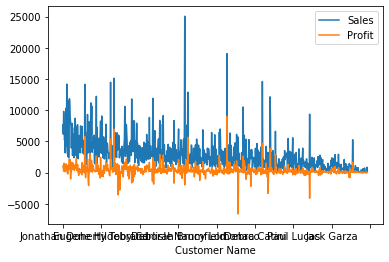

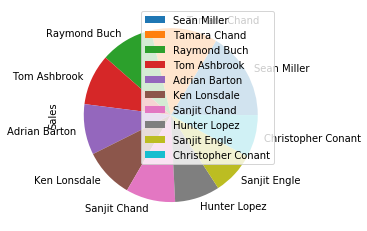

In [60]:
Customer_quantity['Sales'].plot()
Customer_quantity['Profit'].plot()
plt.legend()
Customer_with_the_most_sales.plot.pie(x = 'Customer Name', y = 'Sales')

In [61]:
# For which segment there was the most sales:
# Are  3 types of segments: Consumer, Corporate and Home Office
Segment_quantity = data_truncated.groupby(['Segment']).sum().sort_values('Sales', ascending=False)
Segment_quantity

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
Segment,,,,,,
Consumer,25581329,1.161401e+06,19521,820.91,134119.2092,309037.4617
Corporate,15504734,7.061464e+05,11608,477.85,91979.1340,185670.8678
Home Office,8858952,4.296531e+05,6744,262.33,60298.6785,114121.8436


In [62]:
print('The profit raport between Corporate and Consumer in %  is: ', Segment_quantity['Profit']['Corporate']/Segment_quantity['Profit']['Consumer']*100, '%')
print('The profit raport between Home Office and Consumer in %  is: ', Segment_quantity['Profit']['Home Office']/Segment_quantity['Profit']['Consumer']*100, '%')

The profit raport between Corporate and Consumer in %  is:  68.58013445549034 %
The profit raport between Home Office and Consumer in %  is:  44.959017324716065 %


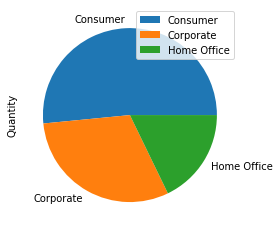

In [63]:
Segment_quantity.plot.pie(x = 'Segment', y = 'Quantity')

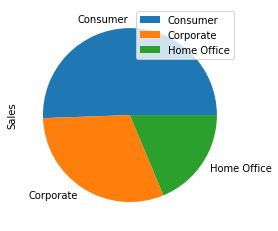

In [64]:
Segment_quantity.plot.pie(x = 'Segment', y = 'Sales')

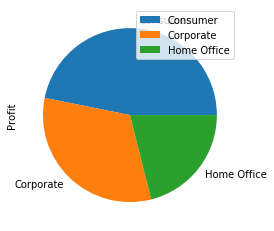

In [65]:
Segment_quantity.plot.pie(x = 'Segment', y = 'Profit')

In [66]:
# What item was sold the most?
Product_quantity = data_truncated.groupby(['Product Name']).sum().sort_values('Quantity', ascending=False)
Product_quantity

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
Product Name,,,,,,
Staples,197557,755.470,215,4.60,292.2046,173.844
Staple envelope,246587,1686.812,170,3.60,751.6290,459.412
Easy-staple paper,230352,2504.192,150,2.80,1096.0292,857.020
Staples in misc. colors,88359,478.812,86,1.20,124.0516,112.346
KI Adjustable-Height Table,89977,4552.641,74,4.25,-248.4822,1182.225
...,...,...,...,...,...,...
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs,9186,207.184,1,0.20,25.8980,207.184
Xerox 20,5559,6.480,1,0.00,3.1104,6.480
Penpower WorldCard Pro Card Scanner,9456,91.475,1,0.50,-1.8295,91.475


In [67]:
Product_with_the_highest_quantity = Product_quantity.head(10)
Product_with_the_highest_quantity

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
Product Name,,,,,,
Staples,197557,755.470,215,4.60,292.2046,173.844
Staple envelope,246587,1686.812,170,3.60,751.6290,459.412
Easy-staple paper,230352,2504.192,150,2.80,1096.0292,857.020
Staples in misc. colors,88359,478.812,86,1.20,124.0516,112.346
KI Adjustable-Height Table,89977,4552.641,74,4.25,-248.4822,1182.225
Avery Non-Stick Binders,85069,217.316,71,6.80,43.5530,59.268
Storex Dura Pro Binders,90241,278.586,71,7.20,50.5494,58.212
GBC Premium Transparent Covers with Diagonal Lined Pattern,83138,780.456,67,5.60,49.5128,176.232
"Situations Contoured Folding Chairs, 4/Set",72205,3641.274,64,2.70,234.2340,873.054


In [68]:
Product_with_the_lowest_quantity = Product_quantity.tail(10)
Product_with_the_lowest_quantity

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
Product Name,,,,,,
Memorex Mini Travel Drive 4 GB USB 2.0 Flash Drive,1694,13.616,2,0.20,3.5742,6.808
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,8337,7.700,2,0.00,3.1570,3.850
PNY Rapid USB Car Charger - Black,4909,9.588,2,0.40,-2.0774,4.794
NeatDesk Desktop Scanner & Digital Filing System,6952,479.988,2,0.40,55.9986,239.994
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,262,1.624,2,0.80,-4.4660,0.812
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs,9186,207.184,1,0.20,25.8980,207.184
Xerox 20,5559,6.480,1,0.00,3.1104,6.480
Penpower WorldCard Pro Card Scanner,9456,91.475,1,0.50,-1.8295,91.475
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1115,119.833,1,0.15,-12.6882,119.833


In [69]:
# Which product has the  highest amount in sales?
Product_sales = data_truncated.groupby(['Product Name']).sum().sort_values('Sales', ascending=False)
Product_sales

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
Product Name,,,,,,
Canon imageCLASS 2200 Advanced Copier,28222,61599.824,20,0.6,2.519993e+04,15399.956
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,61859,27453.384,31,2.4,7.753039e+03,9659.524
Cisco TelePresence System EX90 Videoconferencing Unit,2698,22638.480,6,0.5,-1.811078e+03,3773.080
HON 5400 Series Task Chairs for Big and Tall,44560,21870.576,39,1.6,3.979039e-13,4486.272
GBC DocuBind TL300 Electric Binding System,64915,19823.479,37,3.3,2.233505e+03,6906.823
...,...,...,...,...,...,...
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,8337,7.700,2,0.0,3.157000e+00,3.850
Grip Seal Envelopes,9379,7.072,2,0.2,2.386800e+00,3.536
Xerox 20,5559,6.480,1,0.0,3.110400e+00,6.480


In [70]:
Product_with_the_highest_sales = Product_sales.head(10)
Product_with_the_highest_sales

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
Product Name,,,,,,
Canon imageCLASS 2200 Advanced Copier,28222,61599.824,20,0.6,2.519993e+04,15399.956
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,61859,27453.384,31,2.4,7.753039e+03,9659.524
Cisco TelePresence System EX90 Videoconferencing Unit,2698,22638.480,6,0.5,-1.811078e+03,3773.080
HON 5400 Series Task Chairs for Big and Tall,44560,21870.576,39,1.6,3.979039e-13,4486.272
GBC DocuBind TL300 Electric Binding System,64915,19823.479,37,3.3,2.233505e+03,6906.823
GBC Ibimaster 500 Manual ProClick Binding System,57937,19024.500,48,4.7,7.609800e+02,3272.214
Hewlett Packard LaserJet 3310 Copier,41444,18839.686,38,1.6,6.983884e+03,3839.936
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",19245,18374.895,12,0.5,4.094977e+03,4374.975
GBC DocuBind P400 Electric Binding System,27597,17965.068,27,2.7,-1.878166e+03,4491.267


In [71]:
Product_with_the_lowest_sales = Product_sales.tail(10)
Product_with_the_lowest_sales

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
Product Name,,,,,,
Newell 308,11162,8.400,5,0.0,2.1000,3.360
Stockwell Gold Paper Clips,2525,8.096,5,0.2,3.4040,3.312
4009 Highlighters,9148,8.040,6,0.0,2.7336,1.340
Xerox 1989,2267,7.968,2,0.2,2.6892,3.984
"Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink",8748,7.800,4,0.0,3.0420,3.900
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,8337,7.700,2,0.0,3.1570,3.850
Grip Seal Envelopes,9379,7.072,2,0.2,2.3868,3.536
Xerox 20,5559,6.480,1,0.0,3.1104,6.480
Avery 5,4551,5.760,2,0.0,2.8224,2.880


In [72]:
# For which product was the higher profit?
Product_profit = data_truncated.groupby(['Product Name']).sum().sort_values('Profit', ascending=False)
Product_profit

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
Product Name,,,,,,
Canon imageCLASS 2200 Advanced Copier,28222,61599.824,20,0.60,25199.9280,15399.9560
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,61859,27453.384,31,2.40,7753.0390,9659.5240
Hewlett Packard LaserJet 3310 Copier,41444,18839.686,38,1.60,6983.8836,3839.9360
Canon PC1060 Personal Laser Copier,25179,11619.834,19,0.60,4570.9347,2379.9660
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",19245,18374.895,12,0.50,4094.9766,4374.9750
...,...,...,...,...,...,...
Bush Advantage Collection Racetrack Conference Table,34550,9544.725,33,2.45,-1934.3976,1930.1555
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,28061,9917.640,27,1.40,-2876.1156,1983.5280
Cubify CubeX 3D Printer Triple Head Print,684,7999.980,4,0.50,-3839.9904,1999.9950


In [73]:
Product_with_the_highest_profit = Product_profit.head(10)
Product_with_the_highest_profit

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
Product Name,,,,,,
Canon imageCLASS 2200 Advanced Copier,28222,61599.824,20,0.6,25199.9280,15399.956
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,61859,27453.384,31,2.4,7753.0390,9659.524
Hewlett Packard LaserJet 3310 Copier,41444,18839.686,38,1.6,6983.8836,3839.936
Canon PC1060 Personal Laser Copier,25179,11619.834,19,0.6,4570.9347,2379.966
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",19245,18374.895,12,0.5,4094.9766,4374.975
Ativa V4110MDD Micro-Cut Shredder,6213,7699.890,11,0.0,3772.9461,1399.980
"3D Systems Cube Printer, 2nd Generation, Magenta",10619,14299.890,11,0.0,3717.9714,2599.980
Plantronics Savi W720 Multi-Device Wireless Headset System,36058,9367.290,24,0.4,3696.2820,2784.870
Ibico EPK-21 Electric Binding System,16910,15875.916,13,1.0,3345.2823,3779.980


In [74]:
Product_with_the_lowest_profit = Product_profit.tail(10)
Product_with_the_lowest_profit

,Row ID,Sales,Quantity,Discount,Profit,Sales per unit
Product Name,,,,,,
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables,9261,1706.250,15,1.45,-1148.4375,339.0625
Balt Solid Wood Round Tables,22112,6518.754,19,0.80,-1201.0581,1428.7680
Martin Yale Chadless Opener Electric Letter Opener,20284,16656.200,22,0.60,-1299.1836,4497.1740
Cisco TelePresence System EX90 Videoconferencing Unit,2698,22638.480,6,0.50,-1811.0784,3773.0800
GBC DocuBind P400 Electric Binding System,27597,17965.068,27,2.70,-1878.1662,4491.2670
Bush Advantage Collection Racetrack Conference Table,34550,9544.725,33,2.45,-1934.3976,1930.1555
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,28061,9917.640,27,1.40,-2876.1156,1983.5280
Cubify CubeX 3D Printer Triple Head Print,684,7999.980,4,0.50,-3839.9904,1999.9950
Lexmark MX611dhe Monochrome Laser Printer,4419,16829.901,18,1.60,-4589.9730,4079.9760


In [75]:
# Which customer in which state bought the most?
# We can see who sold the most within each state.

group_1 = data_truncated.groupby(['State','Customer Name']).sum()
total_sales = group_1['Sales'].groupby(level=0, group_keys=False)
total_sales.nlargest(5)

State      Customer Name    
Alabama    Mark Cousins         3236.410
           Alan Schoenberger    2216.800
           Irene Maddox         1979.890
           Natalie Webber       1918.790
           Karen Carlisle       1319.960
                                  ...   
Wisconsin  Justin Ellison       2657.810
           Dana Kaydos          2531.880
           Mike Pelletier       2233.020
           Justin Deggeller     1986.520
Wyoming    Michelle Arnett      1603.136
Name: Sales, Length: 232, dtype: float64

In [76]:
#group_2 = data_truncated.groupby(['Days of transport','Sales'])
#total_sales_for_shipmode = group_2['Sales'].groupby(level=0, group_keys=False)
#data_truncated.groupby(['Days of transport', 'Product Name', 'Sales']).plot(x='Product Name', y= ['Days of transport','Sales'] ,figsize=(10,5), grid=True)

In [77]:
# Change the order of columns
data_truncated = data_truncated[Columns]
data_truncated

,Row ID,Order ID,Order Date,Ship Date,Days of transport,Ship Mode,Customer ID,Customer Name,Segment,City,State,Product ID,Category,Sub-Category,Product Name,Sales per unit,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,3 days,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,130.9800,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,3 days,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",243.9800,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,4 days,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,7.3100,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,7 days,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,191.5155,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,7 days,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,11.1840,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,2 days,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,8.4160,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,5 days,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,45.9800,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,5 days,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,129.2880,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,5 days,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",7.4000,29.6000,4,0.00,13.3200
